In [1]:
%%time
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Wall time: 8.06 s


In [41]:
df = pd.read_csv('./data/dataonline.csv', parse_dates=["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [42]:
df.shape

(541909, 8)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [44]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [45]:
df = df.dropna(axis=0)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [46]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
df["Revenue"]=df["UnitPrice"]*df["Quantity"]

In [48]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [49]:
# Monthly Revenue Overview
df["InvoiceYear"].value_counts()

2011    379979
2010     26850
Name: InvoiceYear, dtype: int64

In [50]:
df_revenue = df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index(name="Revenue")
df_revenue

,InvoiceMonth,InvoiceYear,Revenue
0,1,2011,475074.380
1,2,2011,436546.150
2,3,2011,579964.610
3,4,2011,426047.851
4,5,2011,648251.080
5,6,2011,608013.160
6,7,2011,574238.481
7,8,2011,616368.000
8,9,2011,931440.372
9,10,2011,974603.590


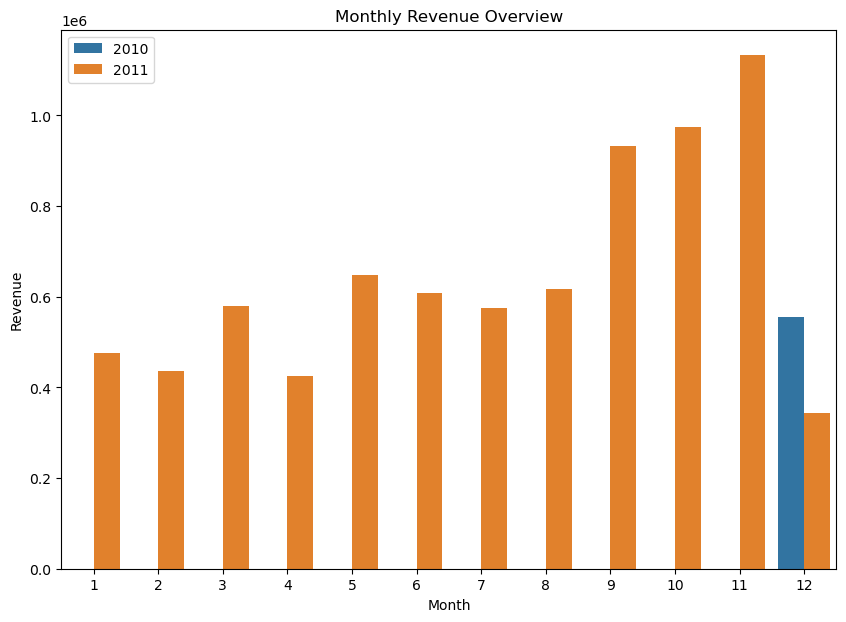

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(loc="upper left")
plt.show()

In [52]:
# Look at the December 2011 data
df_december_2011 = df.query("InvoiceMonth==12 and InvoiceYear==2011").copy()
df_december_2011['InvoiceDay'] = df_december_2011['InvoiceDate'].dt.day
df_december_2011['InvoiceDay'].value_counts().sort_index()

1    2226
2    2018
4    1946
5    3398
6    2654
7    2196
8    2599
9     624
Name: InvoiceDay, dtype: int64

In [53]:
# Monthly Items Sold
df_quantity = df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
df_quantity.head()

,InvoiceMonth,InvoiceYear,Quantity
0,1,2011,269379
1,2,2011,262833
2,3,2011,344012
3,4,2011,278585
4,5,2011,367852


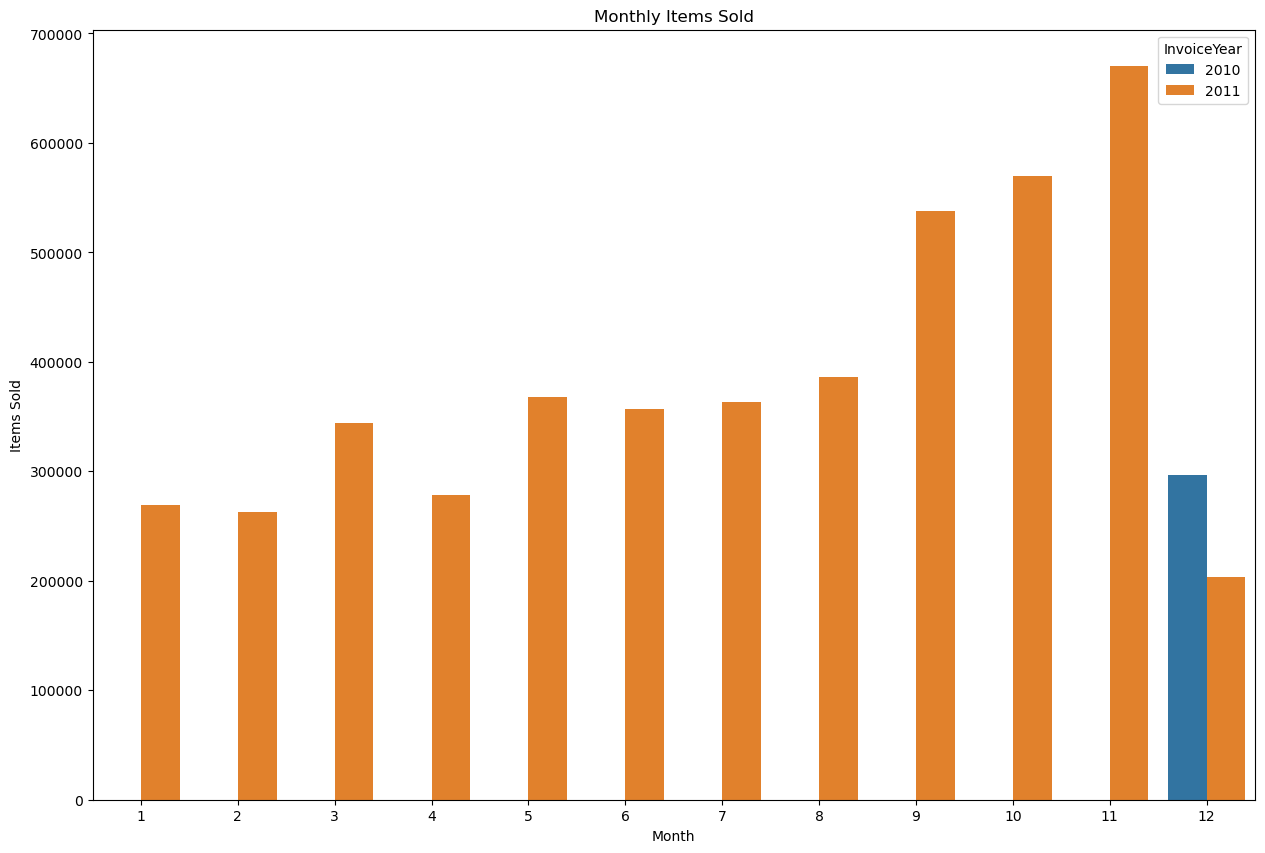

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", hue="InvoiceYear",data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")
plt.show()

In [55]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
df_active

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


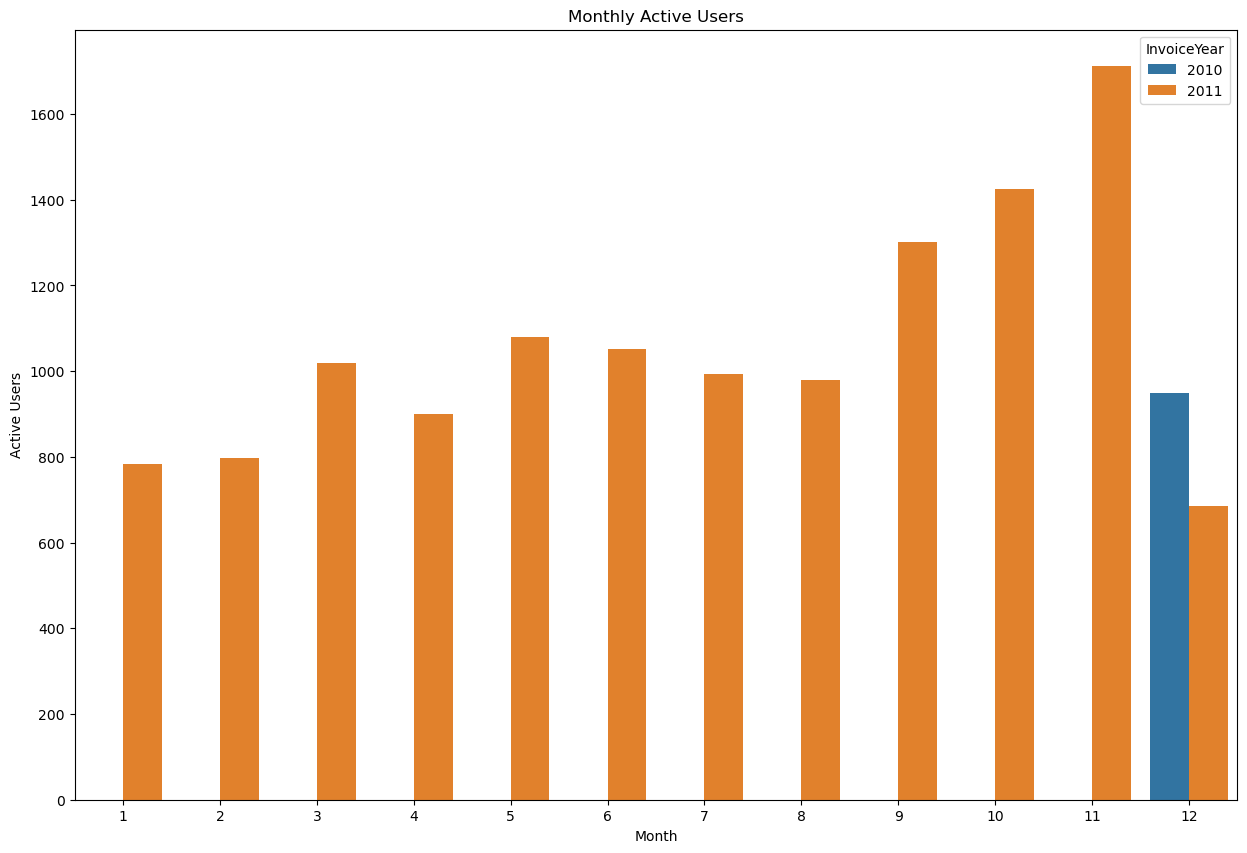

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")
plt.show()

In [57]:
df_active_2011 = df_active[df_active['InvoiceYear'] != 2010]
df_active_2011

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


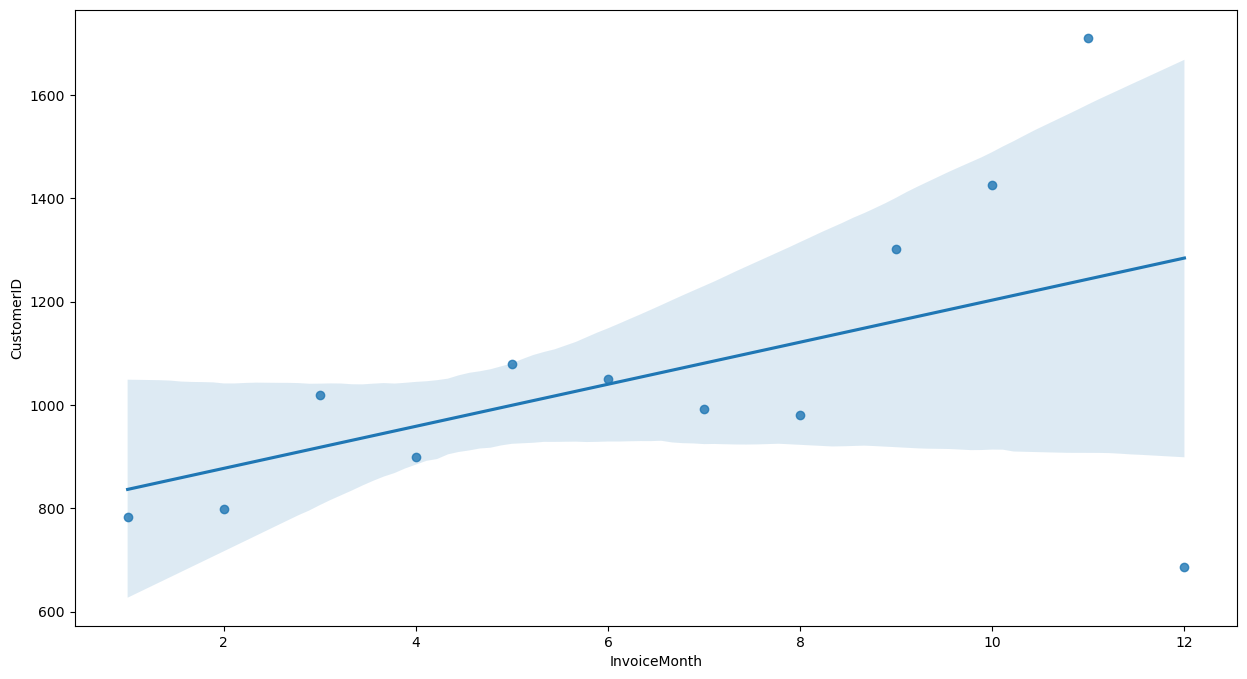

In [58]:
plt.figure(figsize=(15,8))
sns.regplot(x="InvoiceMonth", y="CustomerID", data=df_active_2011)
plt.show()

In [59]:
df_first_purchase = df.groupby("CustomerID")["InvoiceDate"].min().reset_index(name="FirstPurchaseDate")
df_first_purchase.head()

,CustomerID,FirstPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [60]:
df = pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"] = "New"
df.loc[df["InvoiceDate"] > df["FirstPurchaseDate"], "UserType"]="Existing"

In [62]:
df[df['UserType'] == 'Existing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,FirstPurchaseDate,UserType
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
10,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
11,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12-01 08:26:00,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406621,581125,21680,WOODLAND STICKERS,6,2011-12-07 12:41:00,0.85,14087.0,United Kingdom,5.10,12,2011,2011-12-07 12:28:00,Existing
406622,581125,16216,LETTER SHAPE PENCIL SHARPENER,25,2011-12-07 12:41:00,0.06,14087.0,United Kingdom,1.50,12,2011,2011-12-07 12:28:00,Existing
406623,581125,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,1.65,12,2011,2011-12-07 12:28:00,Existing
406624,581125,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,6,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,9.90,12,2011,2011-12-07 12:28:00,Existing


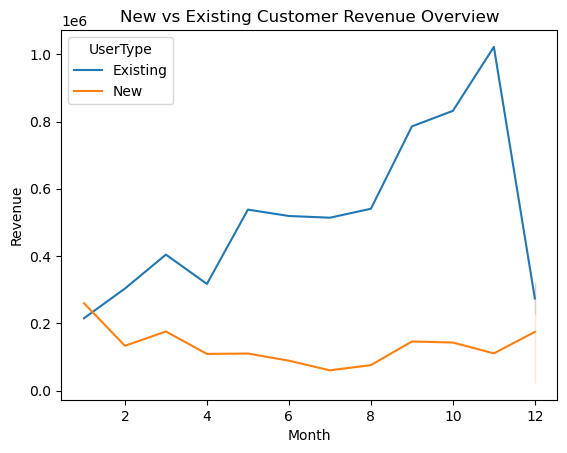

In [65]:
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
sns.lineplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()